In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# PDF of Normal Distribution

Let $X$ be a random variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).
$$

Let $X \sim \mathcal{N}(\mu, \sigma^2)$ denote that $X$ is drawn from a normal distribution with mean $\mu$ and variance $\sigma^2$.




In [37]:
dist = torch.distributions.Normal(0, 1)


In [38]:
dist.support

Real()

In [39]:
dist.mean

tensor(0.)

In [40]:
dist.variance

tensor(1.)

In [41]:
dist.mode

tensor(0.)

In [42]:
## Plotting the PDF

def plot_pdf_normal(mu, sigma):
    dist = torch.distributions.Normal(mu, sigma)
    x = torch.linspace(-10, 10, 1000)
    y = dist.log_prob(x).exp()
    plt.plot(x, y)
    plt.title(f"PDF N({mu}, {sigma})")


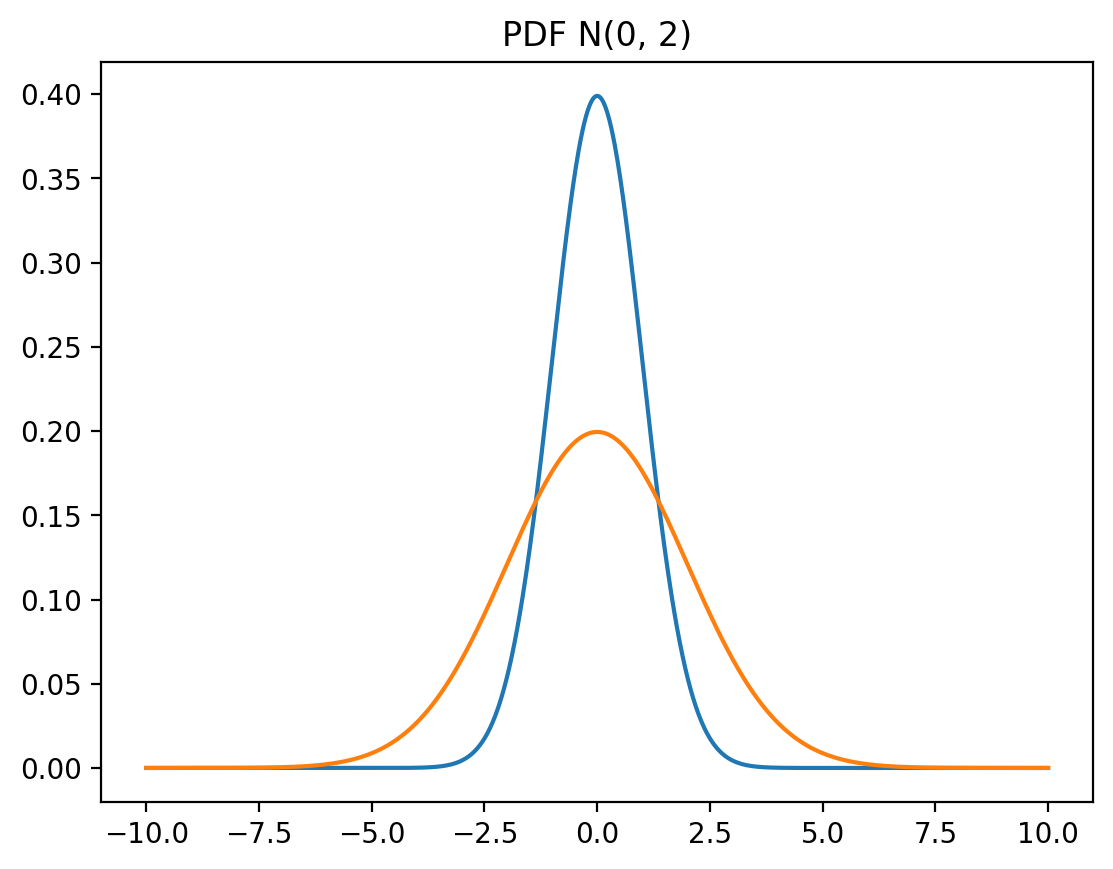

In [43]:
plot_pdf_normal(0, 1)
plot_pdf_normal(0, 2)

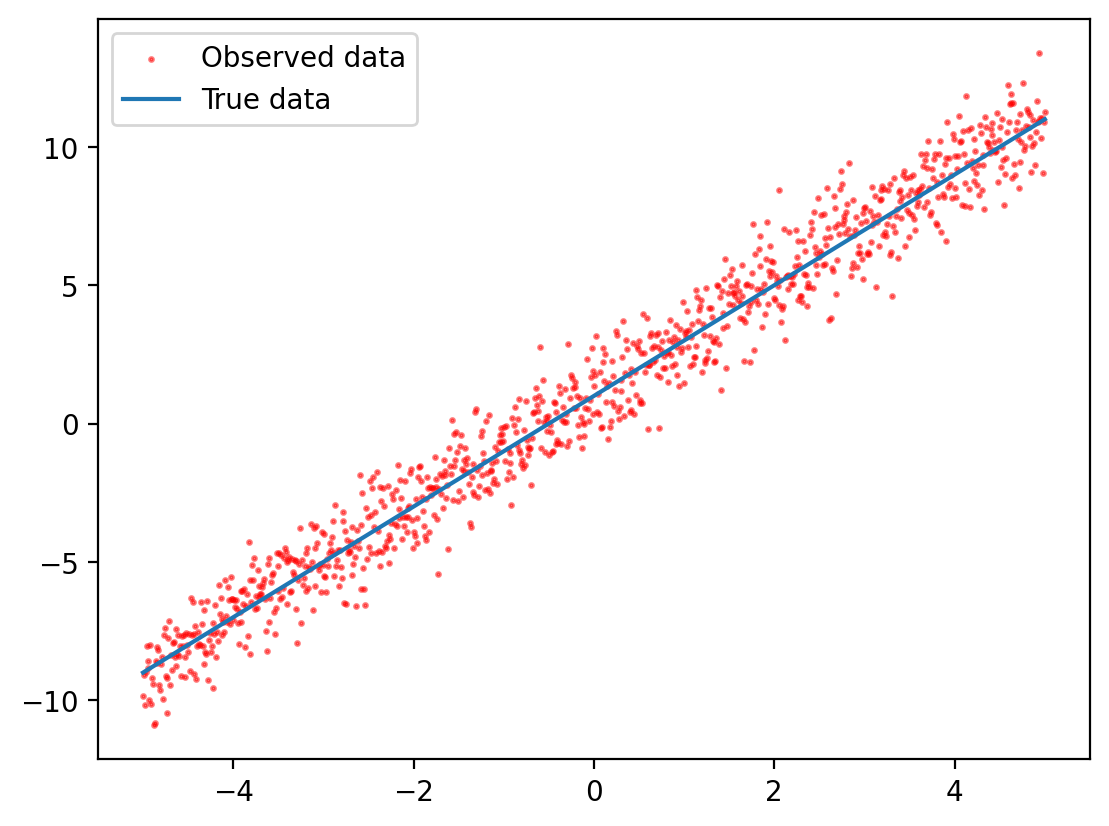

In [44]:
# Simulating data with normal distributed noise

x_true = torch.linspace(-5, 5, 1000)
y_true = 2 * x_true + 1
eps = torch.distributions.Normal(0, 1).sample(y_true.shape)
y_obs = y_true + eps

plt.scatter(x_true, y_obs, 
            label="Observed data", 
            marker='o', s=2,
            alpha = 0.5, color='red')
plt.plot(x_true, y_true, label="True data")
plt.legend()


### Heights and weights data

[Dataset link](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset)

The dataset contains 25,000 rows and 3 columns. Each row represents a person and the columns represent the person's index, height, and weight.

In [14]:
df = pd.read_html("http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html")

In [18]:
store_df = df[0]
store_df.columns = store_df.iloc[0]
store_df = store_df.iloc[1:]
store_df = store_df.astype(float)
store_df = store_df.drop(columns=["Index"])
store_df = store_df.dropna()

In [21]:
store_df.head()

,Height(Inches),Weight(Pounds)
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: ylabel='Density'>

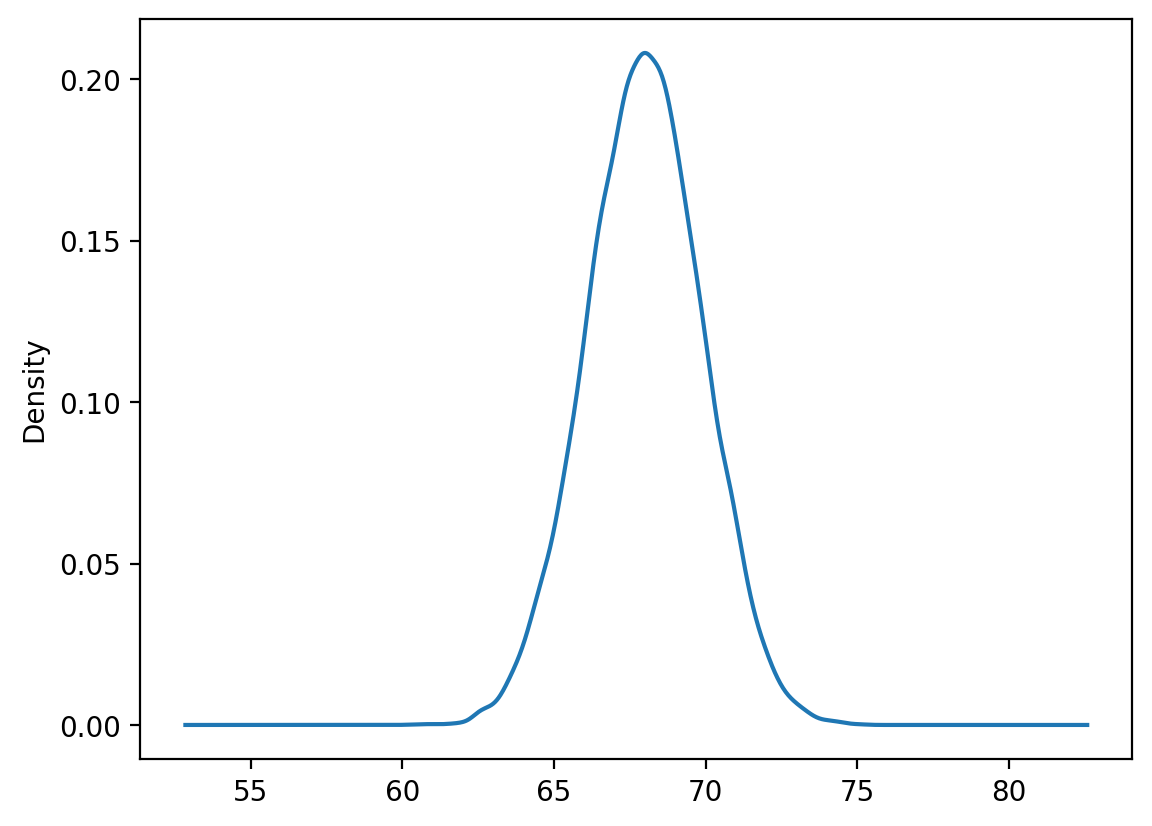

In [22]:
store_df["Height(Inches)"].plot(kind='density')

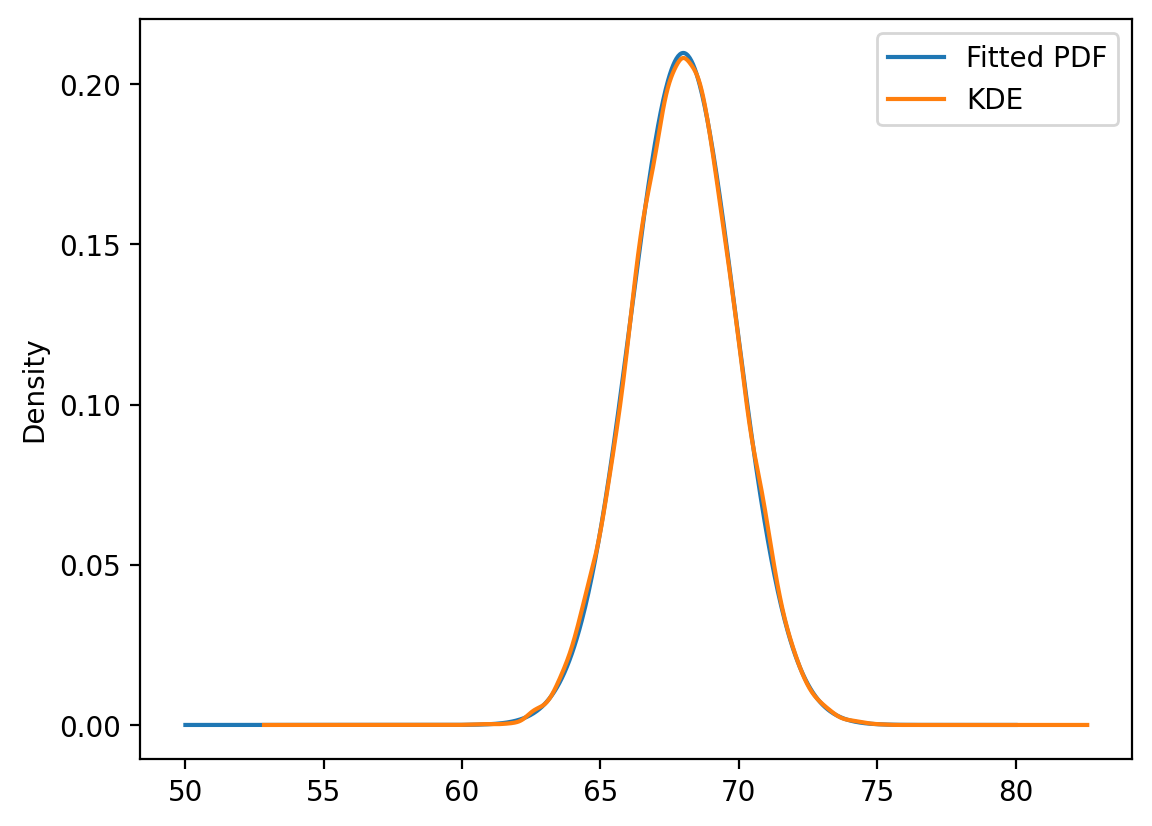

In [27]:
# Fit a normal distribution to the data
mu = store_df["Height(Inches)"].mean().item()
sigma = store_df["Height(Inches)"].std().item()

dist = torch.distributions.Normal(mu, sigma)
x = torch.linspace(50, 80, 1000)
y = dist.log_prob(x).exp()
plt.plot(x, y, label="Fitted PDF")

store_df["Height(Inches)"].plot(kind='density', label="KDE")
plt.legend()

<Axes: ylabel='Density'>

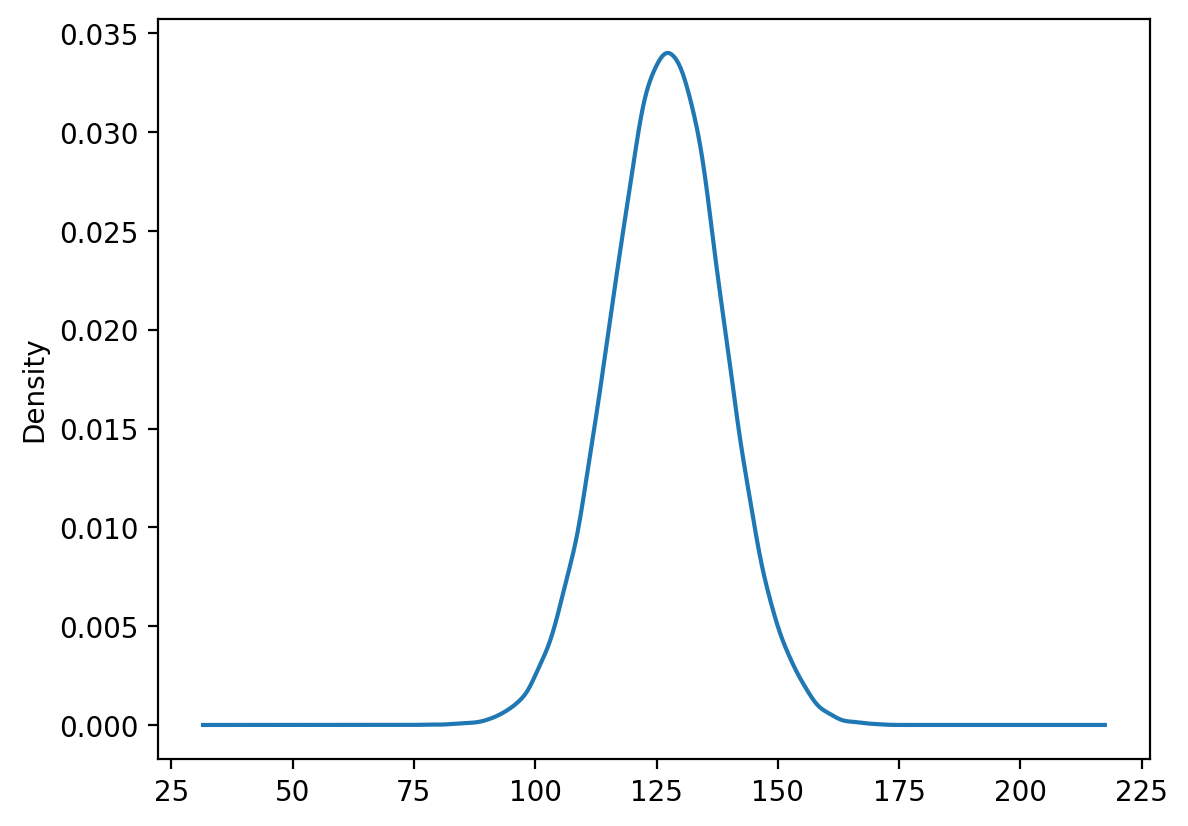

In [28]:
store_df["Weight(Pounds)"].plot(kind='density')

## Log Normal Distribution

Let $Y \sim \mathcal{N}(\mu, \sigma^2)$ be a normally distributed random variable.

Let us define a new random variable $X = \exp(Y)$. 

We can say that log of $X$ is normally distributed, i.e., $\log(X) \sim \mathcal{N}(\mu, \sigma^2)$.

We can also say that $X$ is log-normally distributed.

The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{x\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\log(x)-\mu)^2}{2\sigma^2}\right).
$$

We can derive the PDF of $X$ using the change of variables formula. (will be covered later in the course)


In [45]:
mu = 1.0
sigma = 1.0

log_normal = torch.distributions.LogNormal(mu, sigma)

In [48]:
log_normal.support

GreaterThan(lower_bound=0.0)

In [46]:
log_normal.mean

tensor(4.4817)

In [47]:
log_normal.mode

tensor(1.)

In [49]:
log_normal.variance

tensor(34.5126)

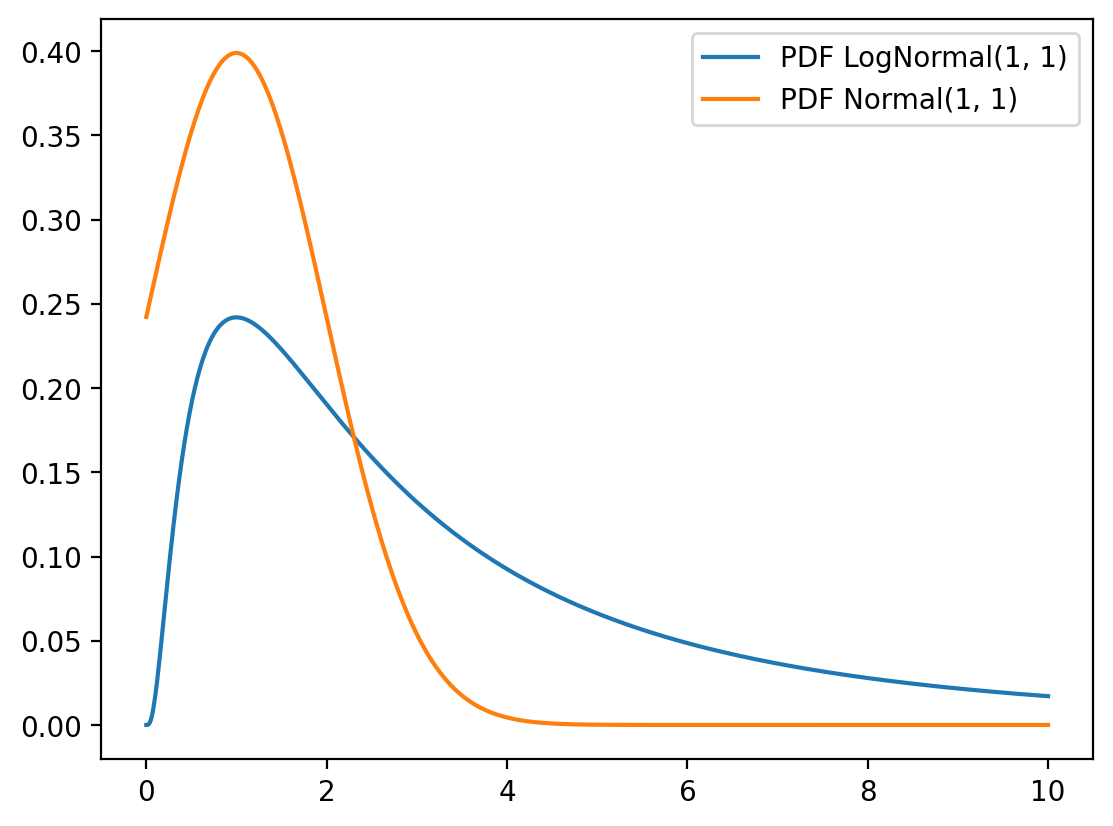

In [ ]:

x = torch.linspace(0.001, 10, 1000)
y = log_normal.log_prob(x).exp()
plt.plot(x, y, label="PDF LogNormal(1, 1)")

normal = torch.distributions.Normal(mu, sigma)
plt.plot(x, normal.log_prob(x).exp(), label="PDF Normal(1, 1)")

plt.legend()



## Uniform Distribution

Let $X$ be a random variable that follows a uniform distribution on the interval $[a, b]$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \begin{cases}
\frac{1}{b-a} & \text{if } x \in [a, b], \\
0 & \text{otherwise}.
\end{cases}

$$

We can say that $X \sim \text{Uniform}(a, b)$.

In [59]:
a = 0.0
b = 2.0
dist = torch.distributions.Uniform(a, b)


In [60]:
dist.support

Interval(lower_bound=0.0, upper_bound=2.0)

In [61]:
dist.high, dist.low

(tensor(2.), tensor(0.))

In [62]:
dist.mean

tensor(1.)

In [63]:
dist.variance

tensor(0.3333)

In [65]:
x_range = torch.linspace(-1, 3, 1000)
try:
    y = dist.log_prob(x_range).exp()
except Exception as e:
    print(e)


Expected value argument (Tensor of shape (1000,)) to be within the support (Interval(lower_bound=0.0, upper_bound=2.0)) of the distribution Uniform(low: 0.0, high: 2.0), but found invalid values:
tensor([-1.0000e+00, -9.9600e-01, -9.9199e-01, -9.8799e-01, -9.8398e-01,
        -9.7998e-01, -9.7598e-01, -9.7197e-01, -9.6797e-01, -9.6396e-01,
        -9.5996e-01, -9.5596e-01, -9.5195e-01, -9.4795e-01, -9.4394e-01,
        -9.3994e-01, -9.3594e-01, -9.3193e-01, -9.2793e-01, -9.2392e-01,
        -9.1992e-01, -9.1592e-01, -9.1191e-01, -9.0791e-01, -9.0390e-01,
        -8.9990e-01, -8.9590e-01, -8.9189e-01, -8.8789e-01, -8.8388e-01,
        -8.7988e-01, -8.7588e-01, -8.7187e-01, -8.6787e-01, -8.6386e-01,
        -8.5986e-01, -8.5586e-01, -8.5185e-01, -8.4785e-01, -8.4384e-01,
        -8.3984e-01, -8.3584e-01, -8.3183e-01, -8.2783e-01, -8.2382e-01,
        -8.1982e-01, -8.1582e-01, -8.1181e-01, -8.0781e-01, -8.0380e-01,
        -7.9980e-01, -7.9580e-01, -7.9179e-01, -7.8779e-01, -7.8378e-01,
 

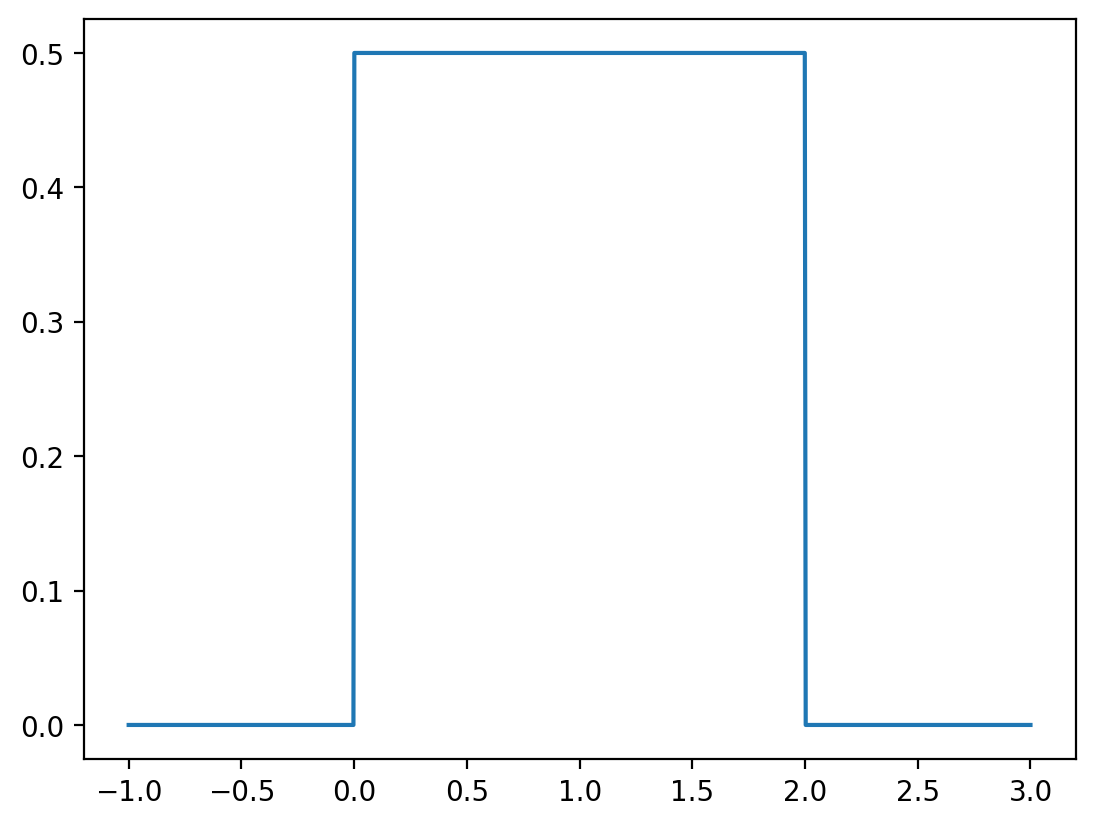

In [67]:
x_range_mask = (x_range >= a) & (x_range <= b)
y = torch.zeros_like(x_range)
y[x_range_mask] = dist.log_prob(x_range[x_range_mask]).exp()

plt.plot(x_range, y)


## Exponential Distribution

Let $X$ be a random variable that follows an exponential distribution with rate parameter $\lambda$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \begin{cases}
\lambda \exp(-\lambda x) & \text{if } x \geq 0, \\
0 & \text{otherwise}.

\end{cases}
$$

We can say that $X \sim \text{Exponential}(\lambda)$.



In [68]:
l = 5.0
dist = torch.distributions.Exponential(l)

In [69]:
dist.support

GreaterThanEq(lower_bound=0.0)

In [70]:
dist.rate

tensor(5.)

In [71]:
dist.mean

tensor(0.2000)

In [72]:
dist.mode

tensor(0.)